### This is my python practice project using the penguins dataset from seaborn 

Author: Ellie Taagen  
Date: March 2025

![Me as a penguin](chick.jpeg)

In [7]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.datasets import make_regression
# import data
penguins = sns.load_dataset("penguins")

These are some data exploration steps you should always take with a new dataset 

In [2]:
print(type(penguins)) # check the type of the dataset, should be a DataFrame
print(penguins.head()) # look at the first few rows of the dataset 
print(penguins.shape) # check the shape of the dataset
print(penguins.isna().sum()) # check for missing values
# print the unique values for categorical columns
print(penguins['species'].unique())
print(penguins['island'].unique())
print(penguins['sex'].unique())

<class 'pandas.core.frame.DataFrame'>
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
(344, 7)
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female' nan]


               mean         std
        body_mass_g body_mass_g
sex                            
Female  3862.272727  666.172050
Male    4545.684524  787.628884


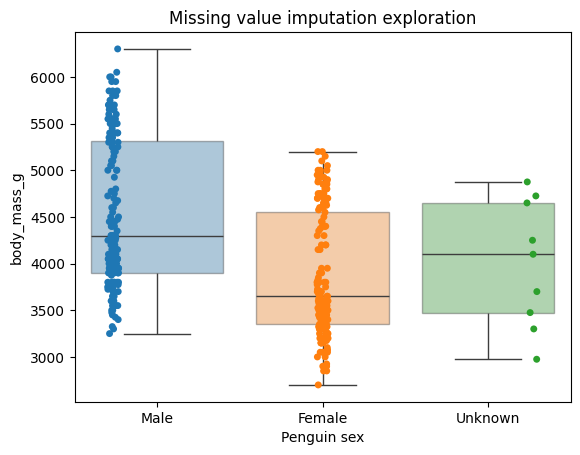

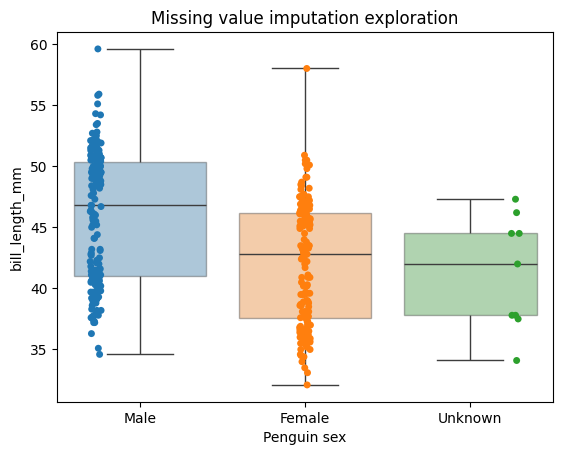

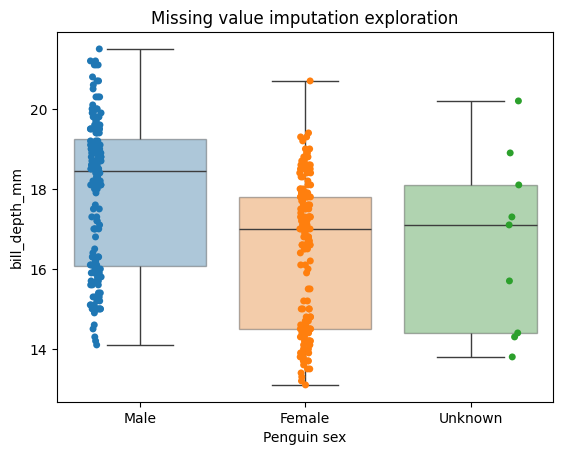

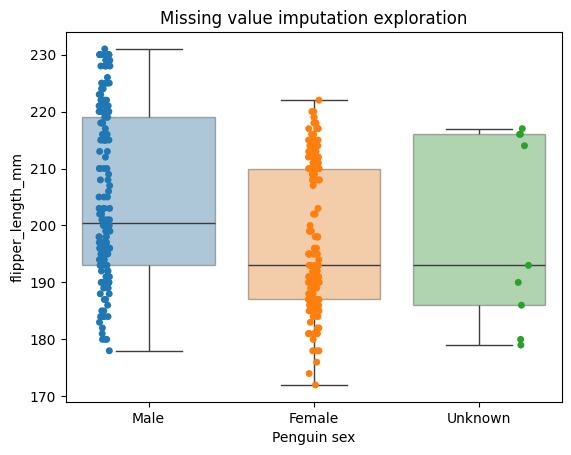

In [4]:
# Decide how to handle the na values
# some options are to drop the na values, replace with the mode (not as applicable to categorical variables), or impute/predict
penguins[penguins['bill_length_mm'].isna() == True] # looks like this is missing for all the quantiative columns, let's delete
# are any of the variables correlated with the missing sex values? 
print(penguins.pivot_table(index = 'sex', values = 'body_mass_g', aggfunc = ['mean', 'std']))

#print(penguins[penguins['sex'].isna() == True][['sex', 'body_mass_g']]) # maybe you could impute based on the quantitative values 

# make a plot with the mean, std, and missing sex values 
# to include missing values give them a name, there is no dropna = False argument for hue in sns
penguins_plot = penguins.copy()
penguins_plot['sex'] = penguins_plot['sex'].fillna('Unknown')
# make a function to plot sex vs quantitative values
def plot_missing_penguin(input_data, quant_value):
    # Function body - code to be executed
    base_plot = sns.boxplot(data = input_data, x = 'sex', y = quant_value, hue='sex', boxprops={'alpha': 0.4})
    sns.stripplot(data = input_data, x= "sex", y= quant_value,
        hue="sex", dodge=True, ax = base_plot)
    plt.xlabel("Penguin sex")
    plt.ylabel(quant_value)
    plt.title("Missing value imputation exploration")
    return plt.show()

plot_variables = ['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
for variable in plot_variables:
    plot_missing_penguin(input_data = penguins_plot, quant_value = variable)


Flipper length looks like it has the clearest split between the Unknown values, but let's run a correlation test. 

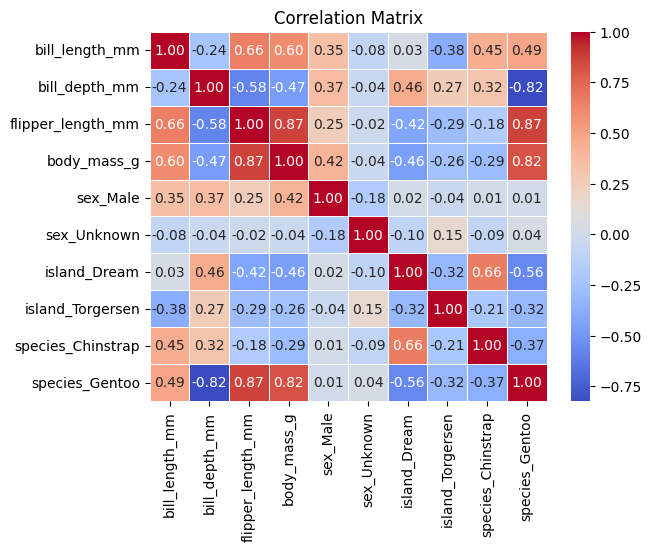

In [6]:
# replace values to have a quantiative sex value
penguins_onehot = pd.get_dummies(penguins_plot, columns=['sex', 'island', 'species'], drop_first=True)
corr_matrix = penguins_onehot.corr()
#plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# ultimately there are not many missing values so it would be appropriate to delete. 
penguins_drop = penguins.dropna(axis = 'index')

# sometime should learn about sklearn impute 
# https://www.geeksforgeeks.org/handling-missing-data-with-iterativeimputer-in-scikit-learn/

Now let's practice subsetting and filtering and sorting the data (then some stats, and hypothesis testing)